**AHMED AMINE ELOUARDI**
----

# **Étude statistique inférentielle d’un dataset  l'Historique de Trafic Réseau**

**Activité Pratique - Statistique Inférentielle**
--

**Contexte pédagogique**
Ce travail s'inscrit dans le cadre du module de Statistique Inférentielle, sous la direction de M. Ahmed Drissi. Il vise à concrétiser les concepts théoriques abordés en cours par une application sur des données réelles.

**Objectifs**
- Appliquer les méthodes d'inférence statistique à un échantillon de taille 𝑛 = 300
- Analyser et comparer les résultats obtenus
- Fournir une interprétation probabiliste des phénomènes observés

**Méthodologie**
Pour garantir précision et efficacité dans les traitements, nous exploitons les capacités du langage Python et de ses bibliothèques dédiées à l'analyse statistique et à la visualisation.

**Outils techniques**
- **Langage** : Python
- **Bibliothèques principales** :
  - Calcul scientifique : NumPy, SciPy
  - Analyse de données : Pandas
  - Visualisation : Matplotlib, Seaborn
  - Tests statistiques : Scipy.stats

Cette approche nous permet d'automatiser les calculs complexes et de générer des représentations graphiques éclairantes pour l'interprétation des résultats.

In [2]:
#important les Bibliothèques Nécessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Voir les premiere lignes pour savoir si l importation du fichier est faites
df = pd.read_csv("historique_reseau_TP_etudiants.csv")
df.head()


,Jour,Protocole,Duree_s,Taille_Ko,Debit_Ko_s,Type_Flux
0,Jeudi,DNS,0.49,113.26,114.40,Attaque
1,Vendredi,DNS,0.78,258.52,201.97,Normal
2,Mercredi,HTTP,3.84,285.88,65.87,Normal
3,Vendredi,DNS,3.82,636.52,147.34,Attaque
4,Vendredi,FTP,3.07,466.86,130.77,Normal


**Description du dataset**

Ce dataset est de taille 300 × 6 (il contient 300 enregistrements correspondant à l’historique de trafic d’un réseau informatique sur 5 jours, et 6 caractères statistiques)
Les principales variables sont les suivantes :


*   Jour de Type : qualitatif ordinal a pour valeur :Lundi, Mardi, Mercredi, Jeudi, Vendredi
*   Protocole de Type : qualitatif nominal
*   Durée_s de Type : quantitatif continu a pour valeurs de [0.01,18.55]
*   Taille_Ko de Type : quantitatif continu a pour valeur de [50,1093]
*   Débits_Ko_s de Type : quantitatif continu a pour valeur de [8.59,1453.2]
*   Type_Flux de Type : qualitatif nominal a pour valeur : Normal et Attaque


---




 **1. Formule deux questions, selon votre intérêt et qui nécessitent une réponse par un raisonnement statistique:**
- Q1:Soit X la variable aleatoire designant la taille d'un debit en Ko choisis aleatoirement
- Q2:Les types de flux dépendent-ils du Protocole ?


---



**Estimon par intervalle de confiance à 95% la moyenne du débit réseau (Débits_Ko_s) du dataset**



In [3]:
# Calculer la moyenne et l'écart-type
moy = df['Debit_Ko_s'].mean()
s = df['Debit_Ko_s'].std()
n = len(df)

IC = stats.t.interval(0.95, n-1, loc=moy, scale=s/np.sqrt(n))
print(f"Moyenne de Debit_Ko_s : {moy:.2f} Ko/s")
print(f"Écart-type : {s:.2f}")
print(f"Intervale de confiance de 95% avec python={IC}")

Moyenne de Debit_Ko_s : 277.87 Ko/s
Écart-type : 254.27
Intervale de confiance de 95% avec python=(np.float64(248.97728288514406), np.float64(306.7569171148559))


 Paramètres d'intérêt :


$\mu$ : le débit moyen du réseau (Débit_Ko_s)

$X$ : variable aléatoire désignant le débit d'une connexion choisie aléatoirement

Calculs Statistiques
Données de l'échantillon :

Taille de l'échantillon : $n = 300$

Moyenne empirique : $\overline{x} = 277.87$ Ko/s

Écart-type empirique : $s = 254.27$ Ko/s

Les Fonction Python

Moyenne  $\overline{x}$: mean_debit = df['Debit_Ko_s'].mean()

Ecart type  $s$: std_debit = df['Debit_Ko_s'].std()

$$
\text{Cherchons } r \text{ vérifiant } 1 - \alpha = p(\bar{x} - r \le \mu \le \bar{x} + r) \\[6pt]
\alpha = 0.05 \\[6pt]
E(X) = \mu \\[6pt]
V(X) = \sigma^2 \Rightarrow \bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)
\Rightarrow \frac{\bar{X} - \sigma}{\sqrt{n}} \sim \mathcal{N}(0,1) \\[6pt]
n = 300 \\[12pt]
1 - \alpha = p(\bar{X} - r \le \mu \le \bar{X} + r)
= p\left( -\frac{r}{\sigma / \sqrt{n}} \le
T = \frac{\bar{X} - \sigma}{\sqrt{n}} \le
\frac{r}{\sigma / \sqrt{n}} \right)
= 2\Phi\left( \frac{r}{\sigma / \sqrt{n}} \right) - 1 \\[12pt]
\text{Pour } \alpha = 0.05 \Rightarrow \frac{r}{\sigma / \sqrt{n}} = 1.96
$$


In [4]:
import math
r=1.96*(s/math.sqrt(n))
print(f"r={r}")

r=28.773407116734194


$$\text{Donc l’intervalle de confiance [a,b] est : }
\quad
[\bar{x} - r,\; \bar{x} + r] \\[6pt]
=[277.87-28.7734,277.87+28.7734]\\[6pt]
=[249.0966,306.6534]\\[6pt]
$$

---



**Q1 : Soit X la variable aleatoire designant la taille d'un debit en Ko choisis aleatoirement**
---


---



In [5]:
moy = df['Taille_Ko'].mean()
s = df['Taille_Ko'].std()

print(f"Moyenne de Taille_Ko_s : {moy:.2f} Ko/s")
print(f"Écart-type : {s:.2f}")

Moyenne de Taille_Ko_s : 507.34 Ko/s
Écart-type : 188.09


$$\text{Formulation des hypothèses}$$
$$H₀ : X \sim N(\mu, \sigma)$$
$$H₁ : X \text{ ne suit pas une loi de Gauss}$$

$$\text{Moyenne : 507.34 Ko/s}\\[4pt]   
\text{Estimation S : 188.09 }\\[4pt]$$


---

$$ \text{La variable de décision  :}\\[4pt]
\text{En utilisant le test du khi-deux d’ajustement, la variable de décision est :}$$

$$
D = \sum_{i=1}^{k} \frac{(n_i - t_i)^2}{t_i}
$$

$$\text{où \(n_i\) sont les valeurs observées et \( t_i \) les valeurs théoriques si }$$
$$H₀ : X \sim N(\mu,\sigma)\text{est vraie.}$$

$$\text{Si }H_0 \text{est vraie :}$$

$$
X \sim N(\mu,\sigma) \Rightarrow T = \frac{X - \mu}{\sigma} \sim N(0,1)
$$

$$
p(X \in [a,b]) =
\Phi\left(\frac{b-\mu}{\sigma}\right)
-
\Phi\left(\frac{a-\mu}{\sigma}\right)
$$

---

$$\text{Valeurs théoriques :}$$

$$
t_i = n \cdot p\left( X \in [a_i, a_{i+1}] \right),
$$



Moyenne = 507.34
Écart-type = 188.09


,Classe,Centre de classe cᵢ,Effectifs observés nᵢ,Effectifs théoriques tᵢ
0,"[50.0, 154.3)",102.15,9,6.82
1,"[154.3, 258.6)",206.45,19,18.82
2,"[258.6, 362.9)",310.75,42,38.48
3,"[362.9, 467.2)",415.05,55,58.27
4,"[467.2, 571.5)",519.35,59,65.40
5,"[571.5, 675.8)",623.65,62,54.39
6,"[675.8, 780.1)",727.95,37,33.51
7,"[780.1, 884.4)",832.25,8,15.30
8,"[884.4, 988.7)",936.55,6,5.18
9,"[988.7, 1093.0)",1040.85,2,1.30


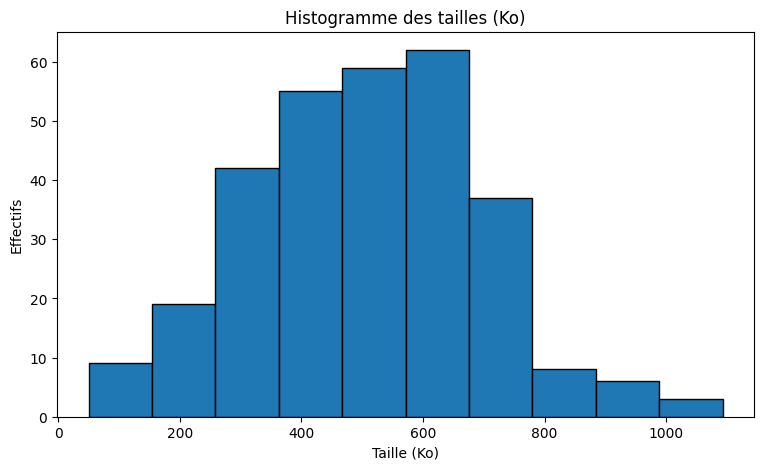

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import erf, sqrt

# Charger ton dataset
df = pd.read_csv("historique_reseau_TP_etudiants.csv")

# Extraire la variable
x = df["Taille_Ko"]
n = len(x)

# Paramètres de la loi normale
mu = x.mean()
sigma = x.std()

print(f"Moyenne = {mu:.2f}")
print(f"Écart-type = {sigma:.2f}")

# Nombre de classes
k = 10
bins = np.linspace(x.min(), x.max(), k+1)

# Création des classes
classes = pd.cut(x, bins, right=False)
obs = classes.value_counts().sort_index()

# Fonction de répartition Phi
def Phi(z):
    return 0.5 * (1 + erf(z / np.sqrt(2)))

# Effectifs théoriques
expected = []
centers = []

for a, b in zip(bins[:-1], bins[1:]):
    p = Phi((b - mu)/sigma) - Phi((a - mu)/sigma) # Phi ces la fonction de repartion de la loi normale N(0,1)
    expected.append(n * p)
    centers.append((a + b) / 2)  # <-- Centre du class interval

expected = pd.Series(expected, index=obs.index)


# Tableau propre avec centre des classes
table = pd.DataFrame({
    "Classe": obs.index.astype(str),
    "Centre de classe cᵢ": np.round(centers, 2),
    "Effectifs observés nᵢ": obs.values,
    "Effectifs théoriques tᵢ": np.round(expected.values, 2)
})

display(table)

# Histogramme
plt.figure(figsize=(9,5))
plt.hist(x, bins=bins, edgecolor="black")
plt.title("Histogramme des tailles (Ko)")
plt.xlabel("Taille (Ko)")
plt.ylabel("Effectifs")
plt.show()



**Apres regroupement des classes**

| Classe (fusionnée)     | (n_i) observés | (t_i) théoriques       |
| ---------------------- | -------------- | ---------------------- |
| C1                     | 9              | 6.82                   |
| C2                     | 19             | 18.82                  |
| C3                     | 42             | 38.48                  |
| C4                     | 55             | 58.27                  |
| C5                     | 59             | 65.40                  |
| C6                     | 62             | 54.39                  |
| C7                     | 37             | 33.51                  |
| C8                     | 8              | 15.30                  |
| **C9 (fusion finale)** | **8 = 6 + 2**  | **6.47 = 5.18 + 1.30** |


In [7]:
# Statistique du Khi-deux
D = ((obs - expected)**2 / expected).sum()
print("\nStatistique Khi-deux D =", round(D, 4))


Statistique Khi-deux D = 7.2546


In [8]:
import pandas as pd
from scipy.stats import chi2


# 1. Tableau des classes regroupées


data = {
    "Classe": ["C1","C2","C3","C4","C5","C6","C7","C8","C9"],
    "n_i": [9, 19, 42, 55, 59, 62, 37, 8, 8],
    "t_i": [6.82, 18.82, 38.48, 58.27, 65.40, 54.39, 33.51, 15.30, 6.47]
}

df = pd.DataFrame(data)

# 2. Calcul de la statistique Khi-deux
df["(n_i - t_i)"] = df["n_i"] - df["t_i"]
df["(n_i - t_i)^2"] = df["(n_i - t_i)"]**2
df["(n_i - t_i)^2 / t_i"] = df["(n_i - t_i)^2"] / df["t_i"]

chi2_obs = df["(n_i - t_i)^2 / t_i"].sum()

df, chi2_obs


(  Classe  n_i    t_i  (n_i - t_i)  (n_i - t_i)^2  (n_i - t_i)^2 / t_i
 0     C1    9   6.82         2.18         4.7524             0.696833
 1     C2   19  18.82         0.18         0.0324             0.001722
 2     C3   42  38.48         3.52        12.3904             0.321996
 3     C4   55  58.27        -3.27        10.6929             0.183506
 4     C5   59  65.40        -6.40        40.9600             0.626300
 5     C6   62  54.39         7.61        57.9121             1.064756
 6     C7   37  33.51         3.49        12.1801             0.363477
 7     C8    8  15.30        -7.30        53.2900             3.483007
 8     C9    8   6.47         1.53         2.3409             0.361808,
 np.float64(7.1034038912440165))

In [9]:

k = 9
ddl = k - 1
ddl


8

In [10]:
# 4. Seuil critique et p-value


alpha = 0.05
chi2_crit = chi2.ppf(1 - alpha, ddl)
p_value = 1 - chi2.cdf(chi2_obs, ddl)

chi2_obs, chi2_crit, p_value


(np.float64(7.1034038912440165),
 np.float64(15.50731305586545),
 np.float64(0.5255184406240168))

In [11]:

# 5. Conclusion automatique


print(" TEST DU KHI-DEUX D’ADEQUATION ")
print(f"-Statistique observée : χ²_obs = {chi2_obs:.3f}")
print(f"-Seuil critique (α=0.05) : χ²_crit = {chi2_crit:.3f}")
print(f"-p-value = {p_value:.4f}")
print(f"-Degrés de liberté = {ddl}")

#Si d<t on rejette H0 sinon on ne le rejette pas.

if chi2_obs < chi2_crit:
    print("\nConclusion : On NE rejette PAS Ho.")
    print("Les données sont compatibles avec une loi normale.")
else:
    print("\nConclusion : On rejette H0.")
    print("Les données ne suivent pas une loi normale.")


 TEST DU KHI-DEUX D’ADEQUATION 
-Statistique observée : χ²_obs = 7.103
-Seuil critique (α=0.05) : χ²_crit = 15.507
-p-value = 0.5255
-Degrés de liberté = 8

Conclusion : On NE rejette PAS Ho.
Les données sont compatibles avec une loi normale.


**Q2:	Les types de flux dépendent-ils du Protocole ?**
---

Afin d’étudier une éventuelle liaison entre deux variables qualitatives, nous réalisons un test du Khi-deux d’indépendance.
Ici, les deux variables étudiées sont :

-Variables d’étude

X :Protocole réseau
→ DNS, HTTP, HTTPS, FTP, SSH, etc.

Y : Type de flux
→ Normal, Attaque

Nous souhaitons tester si ces deux variables sont indépendantes.

Hypothèses :

- H0 : X et Y sont indépendantes

- H1: X et Y dépendantes

Le test sera réalisé à partir d’un échantillon de (n = 300) observations.

Visualisation exploratoire des distribution de la database par deux categories :

- Type de flux

- Protocole

In [12]:

df = pd.read_csv("historique_reseau_TP_etudiants.csv")

# Créer le tableau de contingence
contingence = pd.crosstab(df["Protocole"], df["Type_Flux"])
contingence

Type_Flux,Attaque,Normal
Protocole,,
DNS,13,60
FTP,10,34
HTTP,17,41
HTTPS,13,52
SSH,9,51


On définit les effectifs observés et totaux de la manière suivante :

$n_{ij}$ effectif observé pour le jour $i$ et le type de flux $j$

$n_{i*} = \sum_j n_{ij}$ effectif total pour le jour $i$

$n_{*j} = \sum_i n_{ij}$ effectif total pour le type de flux $j$

$n = \sum_i \sum_j n_{ij}$ effectif total de l'échantillon

L'effectif théorique $t_{ij}$ se calcule ensuite par :

$$t_{ij} = \frac{n_{i*} \cdot n_{*j}}{n}$$

In [13]:
# Effectifs totaux
n = contingence.values.sum()
ni_star = contingence.sum(axis=1).values.reshape(-1,1)  # somme par ligne
n_starj = contingence.sum(axis=0).values.reshape(1,-1)  # somme par colonne

# Effectifs théoriques
Tij = ni_star * n_starj / n
Tij_df = pd.DataFrame(Tij, index=contingence.index, columns=contingence.columns)
Tij_df

Type_Flux,Attaque,Normal
Protocole,,
DNS,15.086667,57.913333
FTP,9.093333,34.906667
HTTP,11.986667,46.013333
HTTPS,13.433333,51.566667
SSH,12.400000,47.600000


On note $n_{ij}$ les effectifs observés et $t_{ij}$ les effectifs théoriques.  
La statistique de test du $\chi^2$ s'écrit :

$$d = \sum_i \sum_j \frac{(n_{ij} - t_{ij})^2}{t_{ij}}$$

- $n_{ij}$ : effectif observé pour le jour $i$ et le type de flux $j$
- $t_{ij}$ : effectif théorique pour la même cellule, calculé sous l'hypothèse d'indépendance

In [14]:
# Effectifs observés
Nij = contingence.values

# Statistique de test d
d = np.sum((Nij - Tij)**2 / Tij)

print("Statistique de test d :", d)

Statistique de test d : 4.313492463478258


Si (X) et (Y) sont indépendantes, la statistique de test suit approximativement une loi du chi² avec :

$$df=(k-1)(l-1)$$


où (k) est le nombre de modalités de (X) et (l) le nombre de modalités de (Y).

On choisit un risque α = 0.01 et on cherche (t) tel que :

$$1 - \alpha = P(D < t), \quad D \sim \chi^2_{(k-1)(l-1)}$$


On rejette H0 si :

$$ d < t$$


sinon on accepte H0.

In [15]:
from scipy.stats import chi2

# degrés de liberté
k = contingence.shape[0]
l = contingence.shape[1]
df = (k-1)*(l-1)

# Valeur critique pour alpha = 0.01
alpha = 0.01
t = chi2.ppf(1 - alpha, df)

print(f"Pour k = {k} et l = {l} la Valeur critique t est: {t}")

# Décision
if d > t:
    print(f"d = {d:.3f} > t = {t:.3f} : on rejette H0 → X et Y sont dépendants")
else:
    print(f"d = {d:.3f} <= t = {t:.3f} : on accepte H0 → X et Y sont indépendants")


Pour k = 5 et l = 2 la Valeur critique t est: 13.276704135987622
d = 4.313 <= t = 13.277 : on accepte H0 → X et Y sont indépendants


**Conclusion:**
-
Après avoir calculé la statistique de test :

  


et comparé à la valeur critique (t) de la loi chi2 pour un risque α = 0.01 :

Si (d > t) : on rejette l'hypothèse nulle (H_0) et on conclut que les variables Jour et Type_Flux sont dépendantes.


Si (d <= t) : on accepte l'hypothèse nulle (H_0) et on conclut que les variables Jour et Type_Flux sont indépendantes.


Ainsi, ce test permet de déterminer qu'il n'existe aucune relation entre le jour de la semaine et le type de flux, ils sont alors independants.